<a href="https://colab.research.google.com/github/HamzaAmirr/Deep-Learning/blob/main/Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [54]:
x_train.shape

(60000, 28, 28)

In [55]:
import matplotlib.pyplot as plt

%matplotlib inline

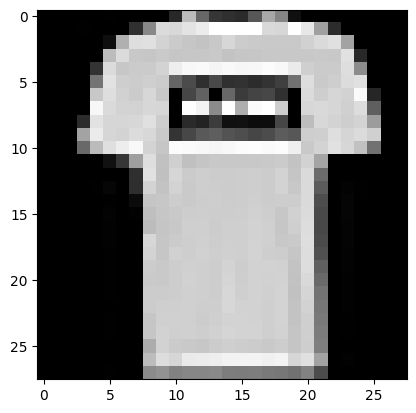

In [56]:
# Looking at the dataset
plt.imshow(x_train[1], cmap = 'gray')

In [57]:
y_train_categorical=keras.utils.to_categorical(
    y_train,num_classes=10
)
y_test_categorical=keras.utils.to_categorical(
    y_test,num_classes=10
)

In [58]:
print(x_train.max())
print(x_test.max())

255
255


In [59]:
# Normalizing the data from 0-255 to 0-1
x_train=x_train/255
x_test=x_test/255

In [60]:
#reshaping to include number of channels
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [61]:
x_train.shape

(60000, 28, 28, 1)

In [62]:
y_train_categorical.shape

(60000, 10)

In [82]:
# Building the Model
Mnist_model=keras.models.Sequential([
    keras.layers.Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.5),

    keras.layers.Conv2D(64,kernel_size=(3,3),padding='same',activation='relu',),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.5),

    keras.layers.Conv2D(128,kernel_size=(3,3),padding='same',activation='relu',),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(10,activation='softmax')

])

Mnist_model.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy']
               )
print(y_train_categorical.shape)
Mnist_model.fit(x_train,y_train_categorical,epochs=20)

(60000, 10)
Epoch 1/20
1875/1875 [==============================] - 10s 4ms/step - loss: 0.6557 - accuracy: 0.7586
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4453 - accuracy: 0.8374
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4003 - accuracy: 0.8517
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3742 - accuracy: 0.8632
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3610 - accuracy: 0.8681
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3522 - accuracy: 0.8702
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3414 - accuracy: 0.8746
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3355 - accuracy: 0.8767
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3316 - accuracy: 0.8780
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step 

In [83]:
Mnist_model.evaluate(x_test,y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 0.2575 - accuracy: 0.9080


[0.2574988603591919, 0.9079999923706055]

In [84]:
print('should be',y_test[2])
print ('is',Mnist_model.predict(x_test)[2].argmax())

should be 1
313/313 [==============================] - 1s 3ms/step
is 1


In [95]:
#a function so that external images can be easily predicted
import requests
from PIL import Image
import numpy as np


def predict_fashion_item(image_url):
    # Send a request to the URL to get the image data
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))

    # Resize the image
    desired_size = (28, 28)
    resized_img = img.resize(desired_size)

    # Convert the image to a numpy array
    image_array = np.array(resized_img)

    # Convert to grayscale if needed
    if len(image_array.shape) == 3:
        image_array = np.dot(image_array[..., :3], [0.2989, 0.5870, 0.1140])

    # Normalize the pixel values
    image_array = image_array / 255.0

    #display the image
    display(img)
    # Reshape the array to match the model's input shape
    input_shape = (1,) + image_array.shape
    image_array = image_array.reshape(input_shape)
    image_array = image_array.reshape(1, 28, 28, 1)

    # Predict using the model
    predicted_class = Mnist_model.predict(image_array).argmax()

    # Class mapping
    class_mapping = {
        0: "T-shirt/top",
        1: "Trouser",
        2: "Pullover",
        3: "Dress",
        4: "Coat",
        5: "Sandal",
        6: "Shirt",
        7: "Sneaker",
        8: "Bag",
        9: "Ankle boot"
    }

    if predicted_class in class_mapping:
        predicted_label = class_mapping[predicted_class]
    else:
        predicted_label = "Unknown Class"

    # Print the predicted class label
    print("Predicted Class Label:", predicted_label)

    return predicted_label


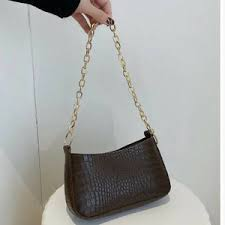

1/1 [==============================] - 0s 21ms/step
Predicted Class Label: Bag


'Bag'

In [96]:
predict_fashion_item("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQYeVENZfbNTyHzBRBgcedHBip4RfIwwwQUJQ&usqp=CAU")

313/313 [==============================] - 1s 3ms/step


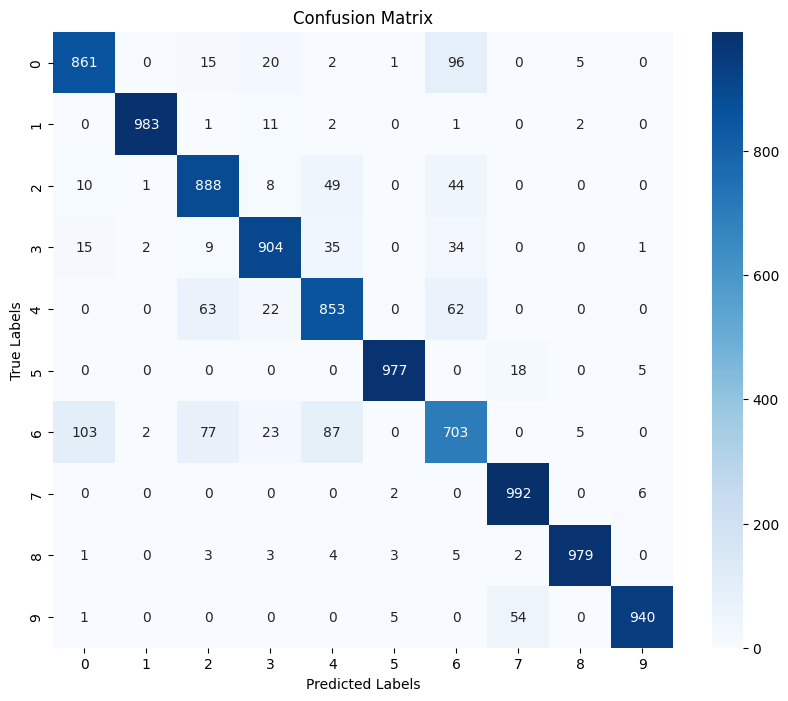

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.84      0.89      0.86      1000
           3       0.91      0.90      0.91      1000
           4       0.83      0.85      0.84      1000
           5       0.99      0.98      0.98      1000
           6       0.74      0.70      0.72      1000
           7       0.93      0.99      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.99      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [107]:
#creating and plotting confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

y_pred_probs = Mnist_model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Get class indices with highest probabilities

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

In [108]:
#saving the model
Mnist_model.save("fashion_mnist_model.h5")
